In [26]:
# Description: This program classifies the MNIST handwritten digit images
#              as a number 0 - 9

# Install packages
pip install tensorflow keras numpy mnist matplotlib

In [0]:
#import the packages / dependecies
import numpy as np 
import mnist # Get data set from
from keras.models import Sequential #ANN architecture
from keras. layers import Dense # The layers in the ANN
from keras.utils import to_categorical
import matplotlib.pyplot as plt # Graph

In [0]:
#Load the data set
train_images = mnist.train_images() # training data of images
train_labels = mnist.train_labels() # training data of the labels
test_images = mnist. test_images()  # testing data images
test_labels = mnist.test_labels()   # testing data labels

In [29]:
#Normalize the images 
#Normalize the pixel values from [0, 255] to [-0.5 to 0.5]
#This make the network easier to train
train_images = (train_images / 255) - 0.5
test_images = (test_images/ 255) - 0.5

#Flatten the images. Flatten each 28 x 28 image into a 784= 28^2 
#dimensional vector and pass into the neural network
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1,784))
#print the new image shape
print(train_images.shape) #60,000 rows and 784 cols
print(test_images.shape)  #10,000 rows and 784 cols

(60000, 784)
(10000, 784)


In [0]:
#Build the ANN model
#With 3 layers, 2 with 64 neurons and activation function = relu
#    and  1 layer with 10 neurons with activation function= softmax
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
#Compile the model
# loss measures how well the model did on training, and then tries to improve on
# it using the optimizer
model.compile(
  optimizer= 'adam',
    loss = 'categorical_crossentropy', #loss function for classes > 2
    metrics = ['accuracy']
)

In [32]:
#Train the model
model.fit(
    train_images, #The training data images
    to_categorical(train_labels),#The trainind data labels, label data only returns a single digit representing the class of each label Ex: train_labels = 2,to_categorical(2)= [0,0,1,0,0,0,0,0,0,0]
    epochs=5, #Number of iterations over the entire data set to train on
    batch_size = 3 #The number of samples per gradient update for training
)

Epoch 1/5
60000/60000 [==============================] - 31s 518us/step - loss: 0.3158 - acc: 0.9014
Epoch 2/5
60000/60000 [==============================] - 31s 513us/step - loss: 0.1876 - acc: 0.9433
Epoch 3/5
60000/60000 [==============================] - 31s 517us/step - loss: 0.1603 - acc: 0.9516
Epoch 4/5
60000/60000 [==============================] - 31s 511us/step - loss: 0.1446 - acc: 0.9570
Epoch 5/5
60000/60000 [==============================] - 30s 498us/step - loss: 0.1365 - acc: 0.9601


In [33]:
#Evaluate the model
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

10000/10000 [==============================] - 0s 28us/step


[0.15349477015165613, 0.9551]

In [0]:
#save the model to disk
model.save_weights('model.h5')
# Load the model from disk later using:
# Build the model.
#model = Sequential([
#  Dense(64, activation='relu', input_shape=(784,)),
#  Dense(64, activation='relu'),
#  Dense(10, activation='softmax'),
#])
# model.load_weights('model.h5')

In [35]:
#Make predictions
# Predict on the first 5 test images.
# Keep in mind that the output of our network is 10 probabilities, 
#   so we'll use np.argmax()to turn those into actual digits
predictions = model.predict(test_images[:5])
#print(predictions)
print (np.argmax(predictions, axis =1))
print(test_labels[:5])

[7 2 1 0 4]
[7 2 1 0 4]


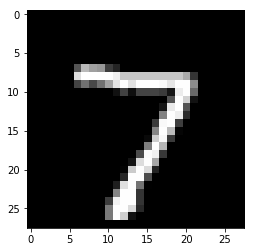

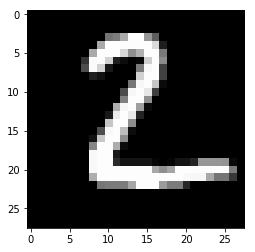

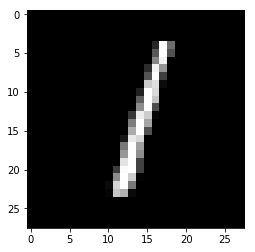

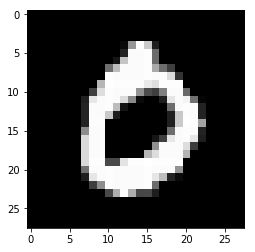

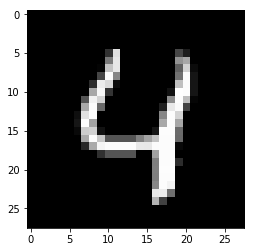

In [36]:
import matplotlib.pyplot as plt
for i in range(0,5):
  first_image = test_images[i]
  first_image = np.array(first_image, dtype='float')
  pixels = first_image.reshape((28, 28))
  plt.imshow(pixels, cmap='gray')
  plt.show()